<a href="https://colab.research.google.com/github/basharataly/nyu-python-public-policy/blob/master/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from google.colab import drive

In [0]:
import matplotlib.pyplot as plt 
import numpy as np

In [0]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/My Drive/Data for Python/cleaned_311_data.csv', header='infer')


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9,18,21,32,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
noise = df[df.complaint_type == 'Noise - Residential']
heatwater = df[df.complaint_type == 'HEAT/HOT WATER']
other = df[(df.complaint_type != 'HEAT/HOT WATER') & (df.complaint_type != 'Noise - Residential')]

In [7]:

count_noise = noise.groupby('community_board').size().reset_index(name='count_of_311_requests')
print(len(count_noise))

count_heatwater = heatwater.groupby('community_board').size().reset_index(name='count_of_311_requests')
print(len(count_heatwater))

count_other = other.groupby('community_board').size().reset_index(name='count_of_311_requests')
print(len(count_other))

count_all = df.groupby('community_board').size().reset_index(name='count_of_311_requests')
print(len(count_all))

69
66
77
77


In [0]:
valid_borocds = ['101','102','103','104','105','106','107','108','109','110','111','112','201','202','203','204','205','206','207','208','209','210','211','212','301','302','303','304','305','306','307','308','309','310','311','312','313','314','315','316','317','318','401','402','403','404','405','406','407','408','409','410','411','412','413','414','501','502','503']

In [0]:
def recode_borocd_counts(row):
  if row.community_board[0] != 'U':
    if 'MANHATTAN' in row.community_board:
      return '1' + row.community_board[0:2]
    elif 'BRONX' in row.community_board:
      return '2' + row.community_board[0:2]
    elif 'BROOKLYN' in row.community_board:
      return '3' + row.community_board[0:2]
    elif 'QUEENS' in row.community_board:
      return '4' + row.community_board[0:2]
    elif 'STATEN ISLAND' in row.community_board:
      return '5' + row.community_board[0:2]
  else:
    return 'Invalid borocd'

In [0]:
count_noise['borocd'] = count_noise.apply(recode_borocd_counts, axis=1)

count_heatwater['borocd'] = count_heatwater.apply(recode_borocd_counts, axis=1)

count_other['borocd'] = count_other.apply(recode_borocd_counts, axis=1)

count_all['borocd'] = count_all.apply(recode_borocd_counts, axis=1)

In [12]:

count_noise = count_noise[count_noise.borocd.isin(valid_borocds)]
print(len(count_noise))

count_heatwater = count_heatwater[count_heatwater.borocd.isin(valid_borocds)]
print(len(count_heatwater))

count_other = count_other[count_other.borocd.isin(valid_borocds)]
print(len(count_other))

count_all = count_all[count_all.borocd.isin(valid_borocds)]
print(len(count_all))

59
59
59
59


In [13]:

print(count_noise.head())
print(count_heatwater.head())
print(count_other.head())
print(count_all.head())

    community_board  count_of_311_requests borocd
1          01 BRONX                   3691    201
2       01 BROOKLYN                   5844    301
3      01 MANHATTAN                    722    101
4         01 QUEENS                   4589    401
5  01 STATEN ISLAND                   5052    501
    community_board  count_of_311_requests borocd
0          01 BRONX                   3346    201
1       01 BROOKLYN                   2868    301
2      01 MANHATTAN                    276    101
3         01 QUEENS                   2466    401
4  01 STATEN ISLAND                   1644    501
    community_board  count_of_311_requests borocd
1          01 BRONX                  20316    201
2       01 BROOKLYN                  59389    301
3      01 MANHATTAN                  20261    101
4         01 QUEENS                  53370    401
5  01 STATEN ISLAND                  58449    501
    community_board  count_of_311_requests borocd
1          01 BRONX                  27353    201


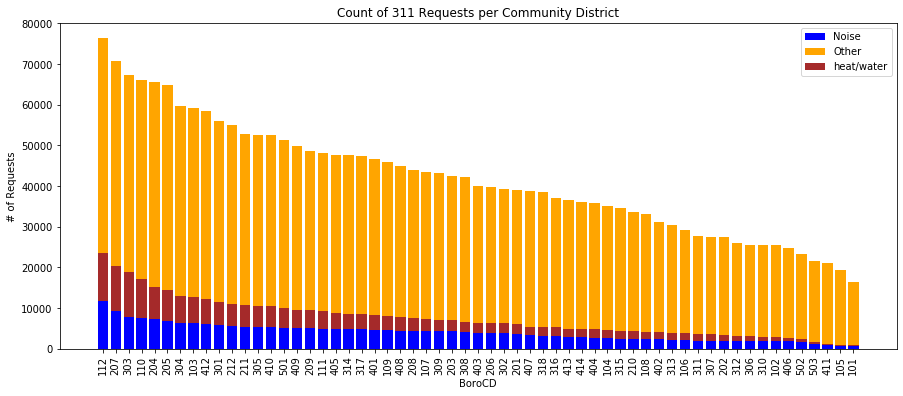

In [153]:

# list of bar positions on x axis
position_on_x = np.arange(len(count_all))

# original set of counts data
# note: it's important to use np.array(series) to convert the pandas series into an array. 
# if you don't do this, the stacking won't work corectly
noise = np.array((count_noise.sort_values(by='count_of_311_requests', ascending=False).count_of_311_requests))
heatwater= np.array((count_heatwater.sort_values(by='count_of_311_requests', ascending=False).count_of_311_requests))
other= np.array((count_other.sort_values(by='count_of_311_requests', ascending=False).count_of_311_requests))

# creating an array (aka list) of test data so we can easily visualize how the stacking works
counts = np.full(len(count_all), count_all.count_of_311_requests)

plt.figure(figsize=(15, 6))

# need to name the plots as objects in order to access their color attributes in the legend
plot1 = plt.bar(
  position_on_x,
  noise,
  align='center',
  color='blue',
  label='Noise'
)
# the second plot gets rendered on top of the first
plot2 = plt.bar(
  position_on_x,
  other,
  bottom=noise, 
  # bottom defines the starting number to which each y value will be added instead of starting at 0
  # the counts value will get added to the corresponding counts_plus_10000 value
  align='center',
  color='orange',
  label='Other'
)
plot3 = plt.bar(
  position_on_x,
  heatwater,
  bottom=noise, 
  # bottom defines the starting number to which each y value will be added instead of starting at 0
  # the counts value will get added to the corresponding counts_plus_10000 value
  align='center',
  color='brown',
  label='heat/water'
)

plt.xticks(position_on_x, count_noise.sort_values(by='count_of_311_requests', ascending=False).borocd, rotation=90)

plt.title('Count of 311 Requests per Community District')
plt.xlabel('BoroCD')
plt.ylabel('# of Requests')
plt.legend() # defaults to putting legend in top right

plt.show()

In [116]:
population = pd.read_csv('/content/drive/My Drive/Data for Python/New_York_City_Population_By_Community_Districts.csv', header='infer')
population.head()

,Borough,CD Number,CD Name,1970 Population,1980 Population,1990 Population,2000 Population,2010 Population
0,Bronx,1,"Melrose, Mott Haven, Port Morris",138557,78441,77214,82159,91497
1,Bronx,2,"Hunts Point, Longwood",99493,34399,39443,46824,52246
2,Bronx,3,"Morrisania, Crotona Park East",150636,53635,57162,68574,79762
3,Bronx,4,"Highbridge, Concourse Village",144207,114312,119962,139563,146441
4,Bronx,5,"University Hts., Fordham, Mt. Hope",121807,107995,118435,128313,128200


In [0]:
noise_count = [ # one subset for all borocd records in manhattan.
  # we are creating a list of two lists. x = population in thousands
  [population['2010 Population']/1000],
  # y = count of 311 requests
  [count_noise.count_of_311_requests]
]

heatwater_count = [ # one subset for all borocd records in manhattan.
  # we are creating a list of two lists. x = population in thousands
  [population['2010 Population']/1000],
  # y = count of 311 requests
  [count_heatwater.count_of_311_requests]
]

other_count = [ # one subset for all borocd records in manhattan.
  # we are creating a list of two lists. x = population in thousands
  [population['2010 Population']/1000],
  # y = count of 311 requests
  [count_other.count_of_311_requests]
]



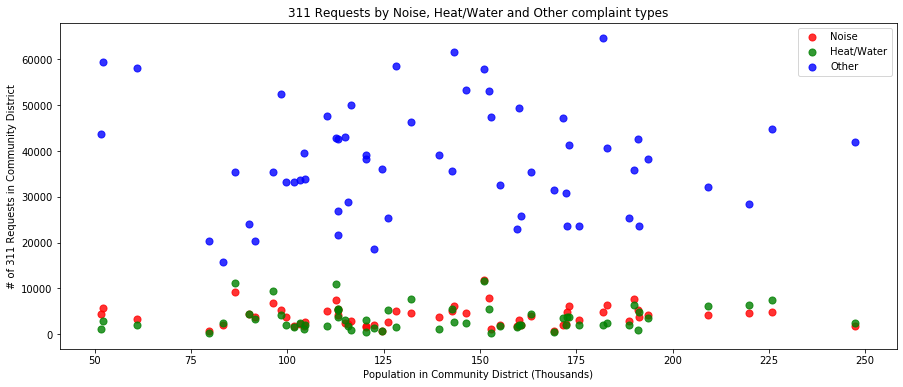

In [162]:

# save the lists of data as one big list of lists, "data_per_cd"
data = [noise_count, heatwater_count, other_count]

# define the color to be used for the markers for each data subset group
colors = ["red", "green", "blue"]

# define the labels to be used for the data subset group
groups = ["Noise", "Heat/Water", "Other"]

plt.figure(figsize=(15,6))

# create a for loop that adds a scatterplot to the figure for each data subset group
for data, color, group in zip(data, colors, groups): 
  x, y = data
  plt.scatter(x, y, alpha=0.8, c=color, s=50, label=group)

plt.title('311 Requests by Noise, Heat/Water and Other complaint types')
plt.xlabel('Population in Community District (Thousands)')
plt.ylabel('# of 311 Requests in Community District')

# add legend at specified location
# loc=1 top right
# loc=2 top left
# loc=3 bottom left
# loc=4 bottom right
plt.legend(loc=1)

plt.show()


No, there seems to be no correlation between population and noise complaints as well as population and heat/water complaints. The scatter shows similar spread of points for both complaint types over the population.